In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 10 03:49:12 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=8.580361788890325
k=1, rel_gap=inf, L=0.0, U=8.580361788890325
k=2, rel_gap=inf, L=0.0, U=4.9202541209664545
k=3, rel_gap=inf, L=0.0, U=2.8342488058798105
k=4, rel_gap=inf, L=0.0, U=1.638406888949768
k=5, rel_gap=inf, L=0.0, U=0.943646822666184
k=6, rel_gap=inf, L=0.0, U=0.542075941928839
k=7, rel_gap=inf, L=0.0, U=0.3098108442539245
k=8, rel_gap=inf, L=0.0, U=0.17676131549222868
k=9, rel_gap=inf, L=0.0, U=0.1007942277640659
k=10, rel_gap=inf, L=0.0, U=0.05763767008157927
k=11, rel_gap=inf, L=0.0, U=0.03286317110335314
k=12, rel_gap=inf, L=0.0, U=0.018651719211270196
k=13, rel_gap=inf, L=0.0, U=0.010557290063569454
k=14, rel_gap=inf, L=0.0, U=0.005967624931685616
k=15, rel_gap=inf, L=0.0, U=0.0033698092727195723
k=16, rel_gap=inf, L=0.0, U=0.0019018519631271733
k=17, rel_gap=inf, L=0.0, U=0.0010729683549907953
k=18, rel_gap=inf, L=0.0, U=0.0006052972309467372
k=19, rel_gap=inf, L=0.0, U=0.00034142417896314156
k=20, rel_gap=inf, L=0.0, U=0.00019239276836147815

# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

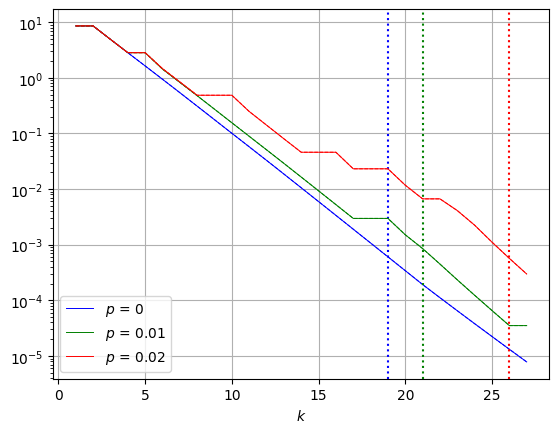

In [6]:
ob.plot_agent_failure_abs(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)